Processing FloorSet-Prime Batches:   0%|          | 0/1954 [00:00<?, ?it/s]/home/dqk5620/research/floorplanning/floorset_housediffusion/prime_dataset.py:209: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related t

area-target data: torch.Size([512, 21]), pins_pos: torch.Size([512, 92, 2]), b2b_connectivity: torch.Size([512, 103, 3]), p2b_connectivity: torch.Size([512, 885, 3]), placement_constraints: torch.Size([512, 21, 5]) polygon_shapes: 21polygon vertices: tensor([[[ 45., 105.],
         [ 45., 135.],
         [ 75., 135.],
         [ 75., 105.],
         [ 45., 105.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.]],

        [[ 75., 135.],
         [ 75., 150.],
         [105., 150.],
         [105., 135.],
         [ 75., 135.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.],
         [ -1.,  -1.]],

        [[105., 135.],
         [105., 150.],
         [135., 150.],
         [135., 135.],
         

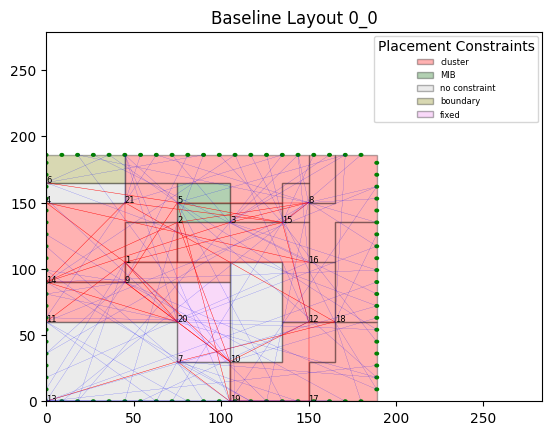

Processing FloorSet-Prime Batches:   0%|          | 0/1954 [00:00<?, ?it/s]


In [1]:
import torch
from torch.utils.data import DataLoader
from prime_dataset import FloorplanDatasetPrime, floorplan_collate
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch, Circle
import matplotlib.patches as patches
from shapely.geometry import Polygon, LineString, Point
import copy
from visualize import get_hard_color, visualize_prime
from tqdm import tqdm


def main():
    root = './'
    ds = FloorplanDatasetPrime(root)
    
    # Create DataLoader with no shuffling for effective file caching
    dl = DataLoader(
        ds, 
        batch_size=512, 
        shuffle=False,
        collate_fn=floorplan_collate
    )
    
    # Iterate over DataLoader
    for batch_idx, batch in tqdm(enumerate(dl), total=len(dl), desc='Processing FloorSet-Prime Batches'):

        area_target, b2b_connectivity, p2b_connectivity, pins_pos, placement_constraints = batch[0]
        sol, metrics = batch[1]
    
        # Print sizes of data for debugging
        # area_target: bsz x n_blocks - Area targets for each block
        # b2b_connectivity: bsz x b2b_edges x edge-weight - Block-to-block connectivity
        # p2b_connectivity: bsz x p2b_edges x edge-weight - Pin-to-block connectivity
        # pins_pos: bsz x n_pins x 2 - Pins or terminals (x, y) location
        # placement_constraints: bsz x n_blocks x 5 - Constraints [fixed, preplaced, multi-instantiation, cluster, boundary]
        # sol: bsz x n_blocks - Polygon shape of each block (target solution) containing a list of polygon vertices for each block.
        # metrics: [area, num_pins, num_total_nets, num_b2b_nets, num_p2b_nets, num_hardconstraints, b2b_weighted_wl, p2b_weighted_wl]
        
        print(f'area-target data: {area_target.size()}, '
              f'pins_pos: {pins_pos.size()}, '
              f'b2b_connectivity: {b2b_connectivity.size()}, '
              f'p2b_connectivity: {p2b_connectivity.size()}, '
              f'placement_constraints: {placement_constraints.size()}',
              f'polygon_shapes: {len(sol[0])}'
              f'polygon vertices: {(sol[0])}')
    
        

        # Visualize results of the first samples of each batch
        for vis_ind in range(1):
            layout_ind = str(batch_idx)+'_'+str(vis_ind)
            visualize_prime(
                sol[vis_ind], 
                b2b_connectivity[vis_ind], 
                p2b_connectivity[vis_ind], 
                pins_pos[vis_ind], 
                placement_constraints[vis_ind],
                layout_ind
            )
        break

if __name__ == "__main__":
    main()

In [ ]:
from prime_dataset import FloorplanDatasetPrime, floorplan_collate
from torch.utils.data   import DataLoader

def load_floorset_prime(batch_size, root, **_):
    ds = FloorplanDatasetPrime(root=root)
    return DataLoader(ds,
                      batch_size=batch_size,
                      shuffle=True,
                      num_workers=8,
                      collate_fn=floorplan_collate,
                      pin_memory=True)